<a href="https://colab.research.google.com/github/bingsen-wang/Math/blob/main/trigonometry_lawOfCotangents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Law of Cotagents</h1></b>

Dr. Bingsen Wang

6/23/2025
</center>

#Python Code

0
0
50
100
150
200
250
300
350
0


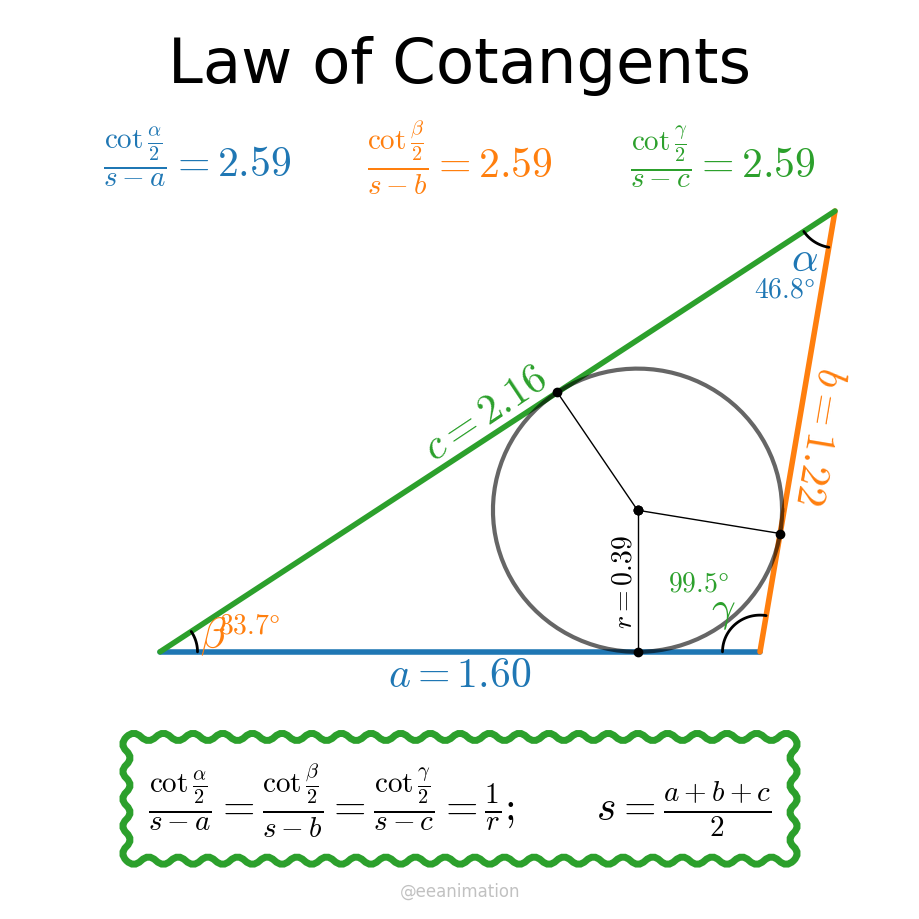

In [47]:
from matplotlib import pyplot,animation,cm
import numpy as np
pyplot.rcParams.update({"font.family":"sans-serif", "mathtext.fontset":"cm"})

def c2ri(x):
  return [np.array(x).real,np.array(x).imag]

Nf=400;
pa=np.linspace(.8,.4,Nf)-1j*.5
pb=-np.linspace(.8,.4,Nf)-1j*.5
pc=np.linspace(1,-1,Nf)+1j*.7
ca=pc-pa; cb=pc-pb; ab=pa-pb

cl = list(cm.tab10.colors) #colors of lines
fig = pyplot.figure(figsize=([9,9]))
ax = fig.add_axes([0,0,1,1],xlim=[-1.2,1.2],ylim=[-1.2,1.25]);ax.axis('off')
ax.text(0,1.05,r'Law of Cotangents',size=45,ha='center')
ax.text(0,-.9,r'$\frac{\cot\frac{\alpha}{2}}{s-a}=\frac{\cot\frac{\beta}{2}}{s-b}=\frac{\cot\frac{\gamma}{2}}{s-c}=\frac{1}{r};\hspace{2} $'+
        r'$s=\frac{a+b+c}{2}$',
        size=30,ha='center',va='center',multialignment='center',
        bbox=dict(boxstyle='roundtooth',pad=.7,facecolor='none',edgecolor=cl[2],lw=5))

lines = [ax.plot([],[],lw=4,c=cl[k],solid_capstyle='round')[0] for k in range(3)]
lines += [ax.plot([],[],lw=2,c='k',solid_capstyle='round')[0] for k in range(3)]
lines += [ax.plot([],[],lw=3,c='k',alpha=.6)[0]]
lines += [ax.plot([],[],lw=1,c='k',marker='o',markersize=6)[0] for _ in range(3) ]
txt = [ax.text(0,0,'',c=cl[k],size=30,ha='center',va='center') for k in range(3)]
txt += [ax.text(0,0,[r'$\alpha$',r'$\beta$',r'$\gamma$'][k],c=cl[k],size=30,ha='center',va='center') for k in range(3)]
txt += [ax.text([-.7,0,.7][k],[.85,.85,.85][k],'',c=cl[k],size=30,ha='center',va='center') for k in range(3)]
txt += [ax.text(0,0,'',c=cl[k],size=20,ha='center',va='center') for k in range(3)]
txt += [ax.text(0,0,'',size=20,ha='right',va='center',rotation=90)]
def animate(i):
  # i=Nf-1
  if i%50==0: print(i)
  a,b,c=np.abs(ab[i]),np.abs(ca[i]),np.abs(cb[i]);s=(a+b+c)/2
  r=np.sqrt((s-a)*(s-b)*(s-c)/s)
  gamma=np.pi-np.angle(ca[i]); gl=np.linspace(np.pi-gamma,np.pi,50)
  beta=np.angle(cb[i]); bl=np.linspace(0,beta,50)
  alpha=np.pi-(gamma+beta); al=np.linspace(np.angle(-cb[i]),np.angle(-cb[i])+alpha,50)
  co=pb[i]+1j*r+r/np.tan(beta/2) #circle center
  cin=r*np.exp(1j*np.linspace(0,2*np.pi,100))+co

  [lines[k].set_data(*c2ri([[pa,pc,pb][k][i],[pb,pa,pc][k][i]]))for k in range(3)]
  [lines[3+k].set_data(*c2ri(.1*np.exp(1j*[al,bl,gl][k])+[pc,pb,pa][k][i]))for k in range(3)]
  lines[6].set_data(*c2ri(cin))
  [lines[7+k].set_data(*c2ri([co,co-1j*r*np.exp(1j*[0,beta-np.pi,np.pi-gamma][k])]))for k in range(3)]

  [txt[k].set_text(['$a$','$b$','$c$'][k]+rf'$={np.abs([ab,ca,cb][k][i]):.2f}$')for k in range(3)]
  txt[0].set_position(((pa[i]+pb[i]).real/2+(-ab[i]/np.abs(ab[i])*.06j).real,(pa[i]+pb[i]).imag/2+(-ab[i]/np.abs(ab[i])*.06j).imag))
  txt[1].set_position(((pa[i]+pc[i]).real/2+(-ca[i]/np.abs(ca[i])*.06j).real,(pa[i]+pc[i]).imag/2+(-ca[i]/np.abs(ca[i])*.06j).imag))
  txt[2].set_position(((pb[i]+pc[i]).real/2+(cb[i]/np.abs(cb[i])*.06j).real,(pb[i]+pc[i]).imag/2+(cb[i]/np.abs(cb[i])*.06j).imag))
  txt[1].set_rotation(np.rad2deg(np.angle(ca[i]))-180)
  txt[2].set_rotation(np.rad2deg(np.angle(cb[i])))

  [txt[3+k].set_position(c2ri(.15*np.exp(1j*[al,bl,gl][k][25])+[pc,pb,pa][k][i]))for k in range(3)]
  txt[6].set_text(r'$\frac{\cot\frac{\alpha}{2}}{s-a}=$'+f'${1/np.tan(alpha/2)/(s-a):.2f}$')
  txt[7].set_text(r'$\frac{\cot\frac{\beta}{2}}{s-b}=$'+f'${1/np.tan(beta/2)/(s-b):.2f}$')
  txt[8].set_text(r'$\frac{\cot\frac{\gamma}{2}}{s-c}=$'+f'${1/np.tan(gamma/2)/(s-c):.2f}$')
  [txt[9+k].set_text(rf'${np.rad2deg([alpha,beta,gamma][k]):.1f}\degree$')for k in range(3)]
  [txt[9+k].set_position(c2ri(.25*np.exp(1j*[al,bl,gl][k][25])+[pc,pb,pa][k][i]))for k in range(3)]
  txt[-1].set_position(c2ri(co-.5j*r))
  txt[-1].set_text(f'$r={r:.2f}$')
  return

ax.text(np.average(ax.get_xlim()),ax.get_ylim()[0]*.99+ax.get_ylim()[1]*.01,r'@eeanimation',size=12,c='.2',alpha=.3,ha='center',va='bottom')
anim = animation.FuncAnimation(fig, animate, frames=Nf, interval=20)
anim.save("LawOfCotangents.mp4",writer=animation.FFMpegWriter(fps=50),dpi=200)